In [22]:
import sys
sys.path.append("venv/lib/python3.6/site-packages")
import pandas as pd
import random
from skimage import io 
import numpy as np
import cv2
from matplotlib import pyplot as plt
import progressbar
import config

In [9]:
train_images_boxable = pd.read_csv('dataset/'+config.BOXABLE_TRAIN_CSV)
train_images_boxable['ImageID'] = train_images_boxable['image_name'].apply(lambda x: x.split('.')[0])
test_images_boxable = pd.read_csv('dataset/'+config.BOXABLE_TEST_CSV)
test_images_boxable['ImageID'] = test_images_boxable['image_name'].apply(lambda x: x.split('.')[0])
class_description_boxable = pd.read_csv('dataset/'+config.CLASS_DESCRIPTION_CSV,header=None)
train_annotations_bbox = pd.read_csv('dataset/'+config.ANNOTATION_TRAIN_CSV)
test_annotations_bbox = pd.read_csv('dataset/'+config.ANNOTATION_VALIDATE_CSV)
labels_name = class_description_boxable[class_description_boxable[1]=='Parrot'][0].values[0]


In [10]:
train_images_boxable

,image_name,image_url,ImageID
0,e39871fd9fd74f55.jpg,https://requestor-proxy.figure-eight.com/figur...,e39871fd9fd74f55
1,f18b91585c4d3f3e.jpg,https://requestor-proxy.figure-eight.com/figur...,f18b91585c4d3f3e
2,ede6e66b2fb59aab.jpg,https://requestor-proxy.figure-eight.com/figur...,ede6e66b2fb59aab
3,ed600d57fcee4f94.jpg,https://requestor-proxy.figure-eight.com/figur...,ed600d57fcee4f94
4,ff47e649b23f446d.jpg,https://requestor-proxy.figure-eight.com/figur...,ff47e649b23f446d
...,...,...,...
1743037,0600da870728676a.jpg,https://requestor-proxy.figure-eight.com/figur...,0600da870728676a
1743038,0bffbae4aa7654b6.jpg,https://requestor-proxy.figure-eight.com/figur...,0bffbae4aa7654b6
1743039,0cbe670c7e0cebfc.jpg,https://requestor-proxy.figure-eight.com/figur...,0cbe670c7e0cebfc
1743040,0aa947b5ee5940ee.jpg,https://requestor-proxy.figure-eight.com/figur...,0aa947b5ee5940ee


In [11]:
train_annotations_bbox

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14610224,fffffdaec951185d,xclick,/m/0dzct,1,0.445625,0.672500,0.154784,0.200750,1,0,...,0,0,0.510000,0.445625,0.538125,0.672500,0.154784,0.168856,0.200750,0.176360
14610225,fffffdaec951185d,xclick,/m/0dzct,1,0.695625,0.786250,0.118199,0.297373,0,0,...,0,0,0.725000,0.748125,0.695625,0.786250,0.118199,0.297373,0.233583,0.207317
14610226,fffffdaec951185d,xclick,/m/0dzct,1,0.788750,0.835000,0.198874,0.272045,1,0,...,0,0,0.814375,0.814375,0.788750,0.835000,0.198874,0.272045,0.245779,0.247655
14610227,fffffdaec951185d,xclick,/m/0dzct,1,0.796875,0.951875,0.156660,0.205441,1,0,...,0,0,0.868750,0.796875,0.951875,0.942500,0.156660,0.176360,0.189493,0.205441


In [12]:
class_description_boxable

,0,1
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


In [13]:
def plot_bbox(images_boxable,annotations_bbox,class_descriptions,img_id):
    img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['image_url'].values[0]
    img = io.imread(img_url)
    try:
        height, width, channel = img.shape
    except:
        import pdb;pdb.set_trace()
    print(f"Image: {img.shape}")
    bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in bboxs.iterrows():
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        xmin = int(xmin*width)
        xmax = int(xmax*width)
        ymin = int(ymin*height)
        ymax = int(ymax*height)
        label_name = row['LabelName']
        class_series = class_descriptions[class_descriptions[0]==label_name]
        class_name = class_series[1].values[0]
        print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
        cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
    plt.figure(figsize=(15,10))
    plt.title('Image with Bounding Box')
    plt.imshow(img)
    plt.axis("off")
    plt.show()

## Obtain a 5 rows sample

In [15]:
least_objects_img_ids = train_annotations_bbox[(train_annotations_bbox['LabelName']==labels_name)]['ImageID'].sample(5).values

In [16]:
train_images_boxable

,image_name,image_url,ImageID
0,e39871fd9fd74f55.jpg,https://requestor-proxy.figure-eight.com/figur...,e39871fd9fd74f55
1,f18b91585c4d3f3e.jpg,https://requestor-proxy.figure-eight.com/figur...,f18b91585c4d3f3e
2,ede6e66b2fb59aab.jpg,https://requestor-proxy.figure-eight.com/figur...,ede6e66b2fb59aab
3,ed600d57fcee4f94.jpg,https://requestor-proxy.figure-eight.com/figur...,ed600d57fcee4f94
4,ff47e649b23f446d.jpg,https://requestor-proxy.figure-eight.com/figur...,ff47e649b23f446d
...,...,...,...
1743037,0600da870728676a.jpg,https://requestor-proxy.figure-eight.com/figur...,0600da870728676a
1743038,0bffbae4aa7654b6.jpg,https://requestor-proxy.figure-eight.com/figur...,0bffbae4aa7654b6
1743039,0cbe670c7e0cebfc.jpg,https://requestor-proxy.figure-eight.com/figur...,0cbe670c7e0cebfc
1743040,0aa947b5ee5940ee.jpg,https://requestor-proxy.figure-eight.com/figur...,0aa947b5ee5940ee


## VIsualize the sample of the rows previously taken

Image: (708, 1024, 3)
Coordinates: (0, 277), (90, 434)
Coordinates: (81, 259), (170, 423)
Coordinates: (172, 275), (255, 395)
Coordinates: (259, 278), (442, 379)
Coordinates: (320, 62), (471, 265)
Coordinates: (472, 151), (646, 289)
Coordinates: (97, 403), (302, 515)
Coordinates: (342, 373), (577, 458)
Coordinates: (632, 299), (825, 413)


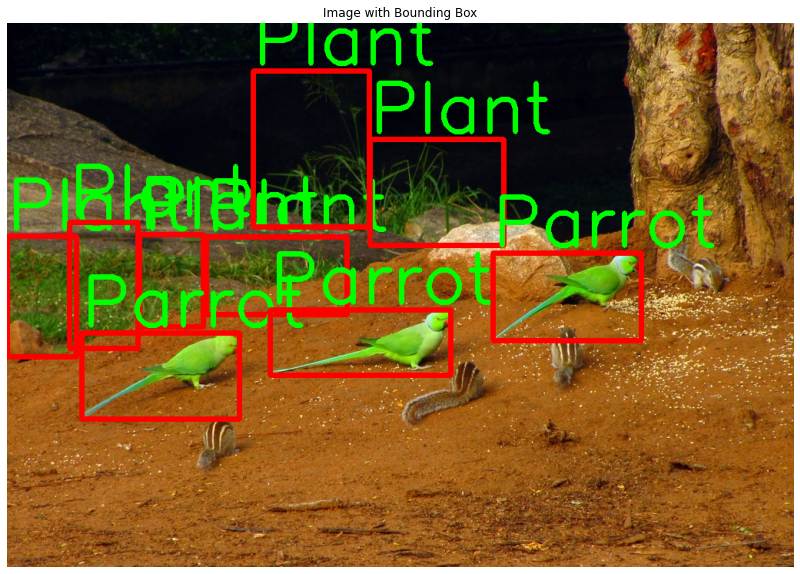

Image: (683, 1024, 3)
Coordinates: (3, 190), (901, 581)


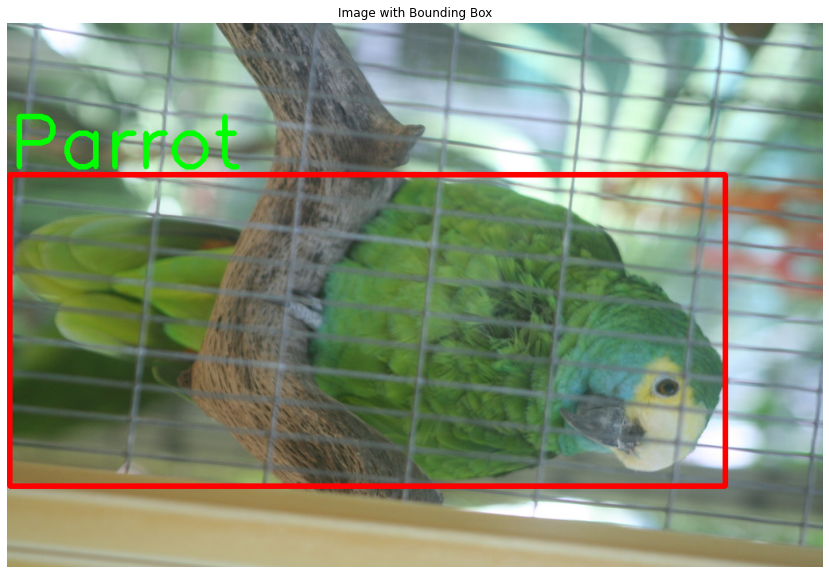

Image: (1024, 683, 3)
Coordinates: (66, 35), (278, 547)
Coordinates: (237, 81), (287, 275)


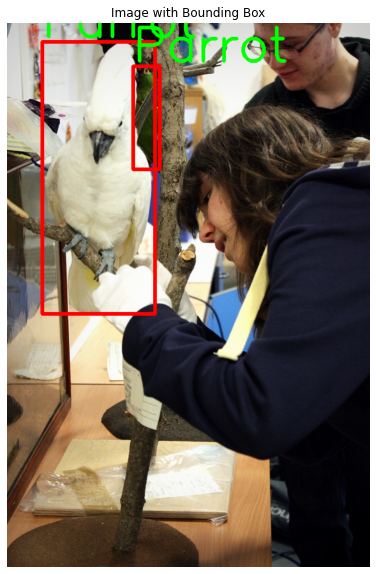

Image: (683, 1024, 3)
Coordinates: (728, 20), (983, 482)
Coordinates: (732, 189), (926, 591)
Coordinates: (792, 75), (873, 184)
Coordinates: (176, 247), (529, 550)


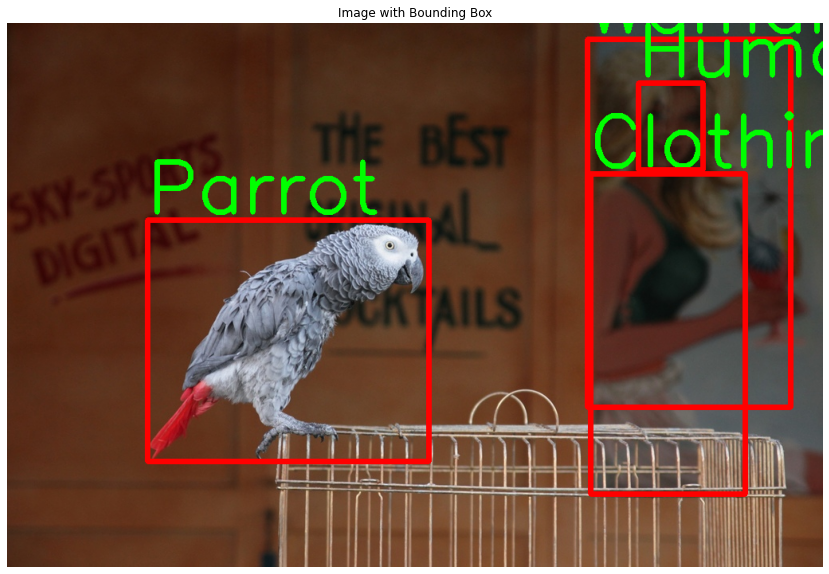

Image: (682, 1024, 3)
Coordinates: (270, 317), (538, 639)
Coordinates: (451, 174), (647, 561)


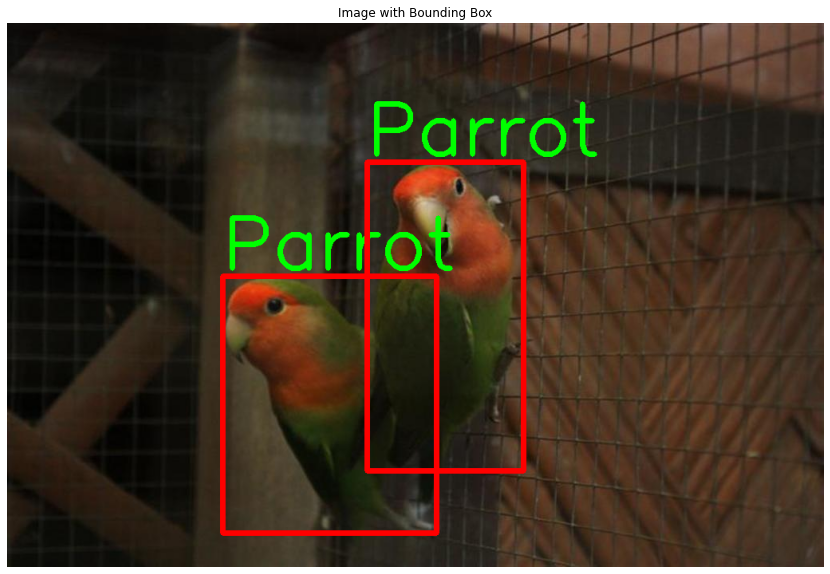

In [17]:
for img_id in list(least_objects_img_ids):
    plot_bbox(train_images_boxable,train_annotations_bbox,class_description_boxable,img_id)

In [35]:
class_bbox_train = train_annotations_bbox[train_annotations_bbox['LabelName']==labels_name].reset_index(drop=True)
class_df_train = train_images_boxable.loc[train_images_boxable['ImageID'].isin(parrot_img_id_train)].reset_index(drop=True)

class_bbox_test = test_annotations_bbox[test_annotations_bbox['LabelName']==labels_name].reset_index(drop=True)
class_df_test = test_images_boxable.loc[test_images_boxable['ImageID'].isin(parrot_img_id_test)].reset_index(drop=True)

In [ ]:
# download images
bar = progressbar.ProgressBar(max_value=len(class_df_train.index))
for idx, row in class_df_train.iterrows():
    img = io.imread(row['image_url'])
    io.imsave('dataset/train/'+row['ImageID']+'.jpg', img)
    bar.update(idx)

In [ ]:
bar = progressbar.ProgressBar(max_value=len(class_df_test.index))
for idx, row in class_df_test.iterrows():
    img = io.imread(row['image_url'])
    io.imsave('dataset/validate/'+row['ImageID']+'.jpg', img)
    bar.update(idx)